#Load data

In [13]:
#https://drive.google.com/file/d/1cxYSDoJqJAz56hdBUa6_bTlmmwyJkqMA/view?usp=sharing
# Load data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
data = pd.read_csv("weatherAUS.csv")

In [14]:
#Clean data
data = data.dropna()
data = data.dropna(subset=['MinTemp','MaxTemp','Rainfall','Humidity3pm','Pressure3pm','Temp3pm','RainToday','WindGustSpeed','RainTomorrow'])
data.to_csv("weatherAUS_Clean.csv", index=False)
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049         SSW           48.0        ENE  ...        20.0         13.0   
6050           S           37.0        SSE  ...        30.0          8.0   
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   
6054         WNW           35.0         NW  ...        19.0         15.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049       1006.3       1004.4       2.0       5.0     26.6     33.4   
6050       1012.9       1012.1       1.0       1.0     20.3     27.0   
6052       1012.3       1009.2       1.0       6.0     28.7     34.9   
6053       1012.7       1009.1       1.0       5.0     29.1     35.6   
6054       1010.7       1007.4       1.0       6.0     33.6     37.6   

      RainToday  RainTomorrow  
6049         No            No  
6050         No            No  
6052         No            No  
6053         No            No  
6054         No            No  

[5 rows x 23 columns]

In [15]:
#‡πÄ‡πÄ‡∏õ‡∏•‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
le_rain = LabelEncoder()
le_raintoday = LabelEncoder()

data['RainToday'] = le_raintoday.fit_transform(data['RainToday'])
data['RainTomorrow'] = le_rain.fit_transform(data['RainTomorrow'])

In [16]:
# Define features (X) and target (y)
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure3pm', 'Temp3pm', 'RainToday', 'WindGustSpeed']
X = data[features]
y = data['RainTomorrow']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
print("‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î:", len(data))
print("‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏£‡∏ô:", len(X_train))
print("‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏™‡∏ï‡πå:", len(X_test))

‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î: 56420
‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏£‡∏ô: 39494
‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ó‡∏™‡∏ï‡πå: 16926


#Grid Search

In [31]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, ParameterGrid
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# ===== Parameter Grid (Medium Level) =====
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

cv = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

best_acc = 0
best_params = None

print("\n............‡∏£‡∏≠‡πÄ‡πÄ‡∏õ‡∏õ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß...........\n")
for params in ParameterGrid(param_grid):
    rf = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(rf, X_train_res, y_train_res, cv=cv, n_jobs=-1)
    mean_acc = scores.mean()

    print(mean_acc)

    if mean_acc > best_acc:
        best_acc = mean_acc
        best_params = params

print(f"\nBest Parameters: {best_params}, Max accuracy: {best_acc:.4f}")


............‡∏£‡∏≠‡πÄ‡πÄ‡∏õ‡∏õ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß...........

0.8153656319002468
0.8164913192189461
0.8150192665714163
0.8148677317400527
0.814348183746807
0.8149976187383642
0.8140018184179764
0.8144564229120665
0.9354028661730961
0.9353379226739404
0.9257695804649955
0.9263757197904491
0.9166341949170889
0.9187340347231242
0.9149673117720916
0.9153569727670261

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Max accuracy: 0.9354


#Model RandomForest

In [34]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_res, y_train_res)

y_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy ‡∏ö‡∏ô Test set: {test_acc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy ‡∏ö‡∏ô Test set: 0.8405

Confusion Matrix:
 [[12096  1102]
 [ 1597  2131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     13198
           1       0.66      0.57      0.61      3728

    accuracy                           0.84     16926
   macro avg       0.77      0.74      0.76     16926
weighted avg       0.83      0.84      0.84     16926



Text(70.72222222222221, 0.5, 'True')

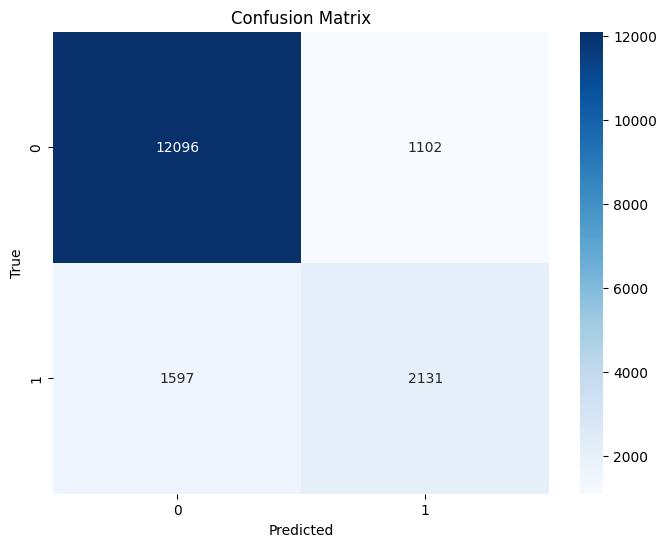

In [35]:
# ‡πÄ‡πÄ‡∏™‡∏î‡∏á seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

plt.xlabel('Predicted')
plt.ylabel('True')

/tmp/ipython-input-2734305645.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


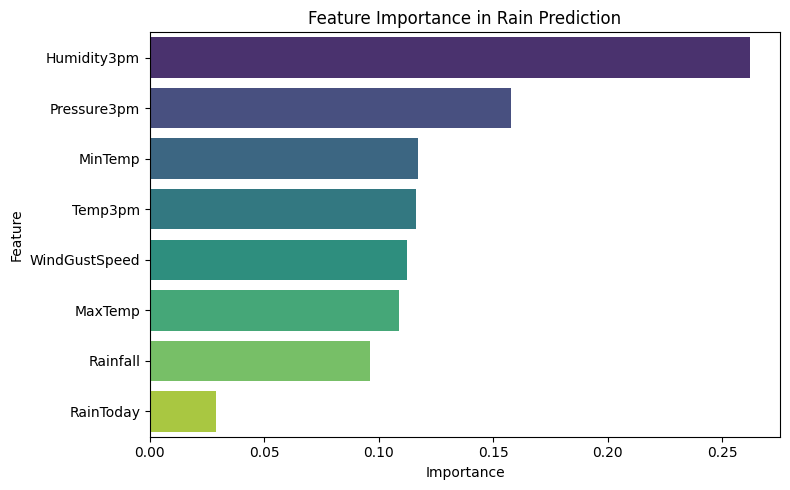

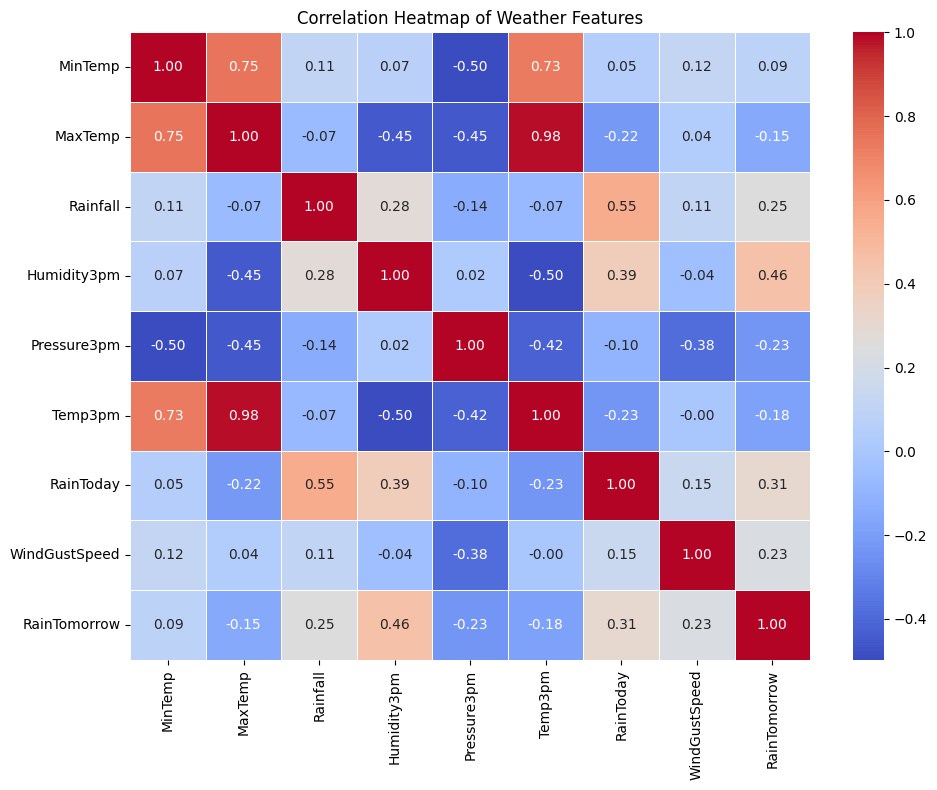

In [36]:
# ===== ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå Feature Importance ‡πÅ‡∏•‡∏∞ Correlation =====
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature Importance
importances = best_rf.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance in Rain Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data[features + ['RainTomorrow']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Features")
plt.tight_layout()
plt.show()


In [37]:
# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• RandomForest
joblib.dump(best_rf, "rf_rain_model.pkl", compress=3, protocol=4)
# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å LabelEncoder
joblib.dump(le_rain, "le_rain.pkl", compress=3, protocol=4)
joblib.dump(le_raintoday, "le_raintoday.pkl", compress=3, protocol=4)

['le_raintoday.pkl']

#App

In [38]:
!pip install streamlit pyngrok

In [39]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•
rf = joblib.load("rf_rain_model.pkl")
le_rain = joblib.load("le_rain.pkl")
le_raintoday = joblib.load("le_raintoday.pkl")

st.title("Rain Prediction App")
st.write("‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏†‡∏≤‡∏û‡∏≠‡∏≤‡∏Å‡∏≤‡∏®‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå‡∏ß‡πà‡∏≤‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏°‡∏µ‡∏ù‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà")

# ‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
mintemp = st.number_input("MinTemp (¬∞C)", -10.0, 40.0, 10.0)
maxtemp = st.number_input("MaxTemp (¬∞C)", -10.0, 50.0, 25.0)
rainfall = st.number_input("Rainfall (mm)", 0.0, 500.0, 0.0)
humidity3pm = st.number_input("Humidity 3 PM (%)", 0, 100, 57)
pressure3pm = st.number_input("Pressure 3 PM (hPa)", 900.0, 1100.0, 1017.6)
temp3pm = st.number_input("Temperature 3 PM (¬∞C)", -10.0, 50.0, 21.8)
windgustspeed = st.number_input("Wind Gust Speed (km/h)", 0.0, 200.0, 35.0)
raintoday = st.selectbox("Did it rain today?", ["No", "Yes"])

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• raintoday
raintoday_encoded = le_raintoday.transform([raintoday])[0]

# ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏Ç‡πâ‡∏≤ DataFrame
user_input = pd.DataFrame([{
    'MinTemp': mintemp,
    'MaxTemp': maxtemp,
    'Rainfall': rainfall,
    'Humidity3pm': humidity3pm,
    'Pressure3pm': pressure3pm,
    'Temp3pm': temp3pm,
    'RainToday': raintoday_encoded,
    'WindGustSpeed': windgustspeed
}])

if st.button("Predict Rain Tomorrow"):
    #class
    prediction = rf.predict(user_input)[0]
    prediction_label = le_rain.inverse_transform([prediction])[0]

    #%
    prob_rain = rf.predict_proba(user_input)[0][1] * 100

    st.markdown(f"### ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏û‡∏¢‡∏≤‡∏Å‡∏£‡∏ì‡πå: **{'üåßÔ∏è ‡∏ù‡∏ô‡∏ï‡∏Å' if prediction_label == 'Yes' else '‚òÄÔ∏è ‡πÑ‡∏°‡πà‡∏ï‡∏Å'}**")
    st.write(f"üîπ ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà‡∏ù‡∏ô‡∏à‡∏∞‡∏ï‡∏Å‡∏û‡∏£‡∏∏‡πà‡∏á‡∏ô‡∏µ‡πâ: **{prob_rain:.2f}%**")

Overwriting app.py
